# CS145: Project 3 | Project Name

## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Fatima, 2018-CE-222*
* *Saad Ali, 2018-CE-228*

## Project Overview

---
This project aims to train model via machine learning that predict Top Reviewed Products. The dataset contains a number of features that help in detecting.
---

## Analysis of Dataset

In [36]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "project1-310314"

In [37]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
%%bigquery --project $project_id
SELECT * FROM `project1-310314.Project3.Products`Limit 3

,Category,Sub_Category_1,Sub_Category_2,Product_ID,Product_Name,Brand_ID,Seller_ID,Prize,Rating_Score,Review,Installment,Description,In_Stock,Top_Reviewed,Special_Offer_Detail,Country,Product_URL,Image_Url,Year
0,Electronic Devices,TV,Toshiba,127824608,Toshiba- LED Smart - 55L5780 -CEVO ENGINE,25290,1109466,Rs. 89900,0.0,0,Installment available,['Full HD - D-LED SMART LED with Toshiba Por...,True,0,Special_Offer_Detail,Pakistan,//www.daraz.pk/products/toshiba-led-smart-55l5...,https://static-01.daraz.pk/p/82cadff3084bae34f...,2021
1,Electronic Devices,TV,Toshiba,128074421,Toshiba-LED Smart- 43L578 - CEVO ENGINE,25290,1109466,Rs. 59900,0.0,0,Installment available,['Full HD - D-LED SMART LED with Toshiba Porta...,True,0,Special_Offer_Detail,Pakistan,//www.daraz.pk/products/toshiba-led-smart-43l5...,https://static-01.daraz.pk/p/2db50941ec6754b33...,2021
2,Electronic Devices,TV,Toshiba,128173854,Toshiba LED TV - 49S2800 LED Basic TV (2K),25290,1109466,Rs. 59900,0.0,0,Installment available,['Full HD - D-LED 1920 x 1080 ANALOGUE TV Pow...,True,0,Special_Offer_Detail,Pakistan,//www.daraz.pk/products/toshiba-led-tv-49s2800...,https://static-01.daraz.pk/p/051b0d737f0053830...,2021


---

##What percentage of Products are "Top Reviewed"?

----

In [96]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT ROUND(      COUNTIF(Top_Reviewed=1)/
                  (SELECT COUNT (*) FROM `project1-310314.Project3.Products`)*1000,2)AS Top_Reviewed  
FROM `project1-310314.Project3.Products`

,Top_Reviewed
0,16.24


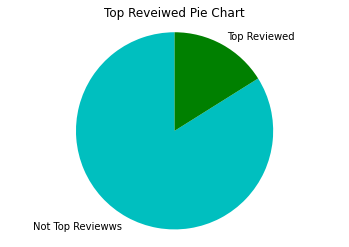

In [110]:
import matplotlib.pyplot as plt
labels = 'Not Top Reviewws', 'Top Reviewed', 
sections = [84.7,16.24]
colors = ['c', 'g']
plt.pie(sections, labels=labels, colors=colors,
        startangle=90)

plt.axis('equal') # Try commenting this out.
plt.title('Top Reveiwed Pie Chart')
plt.show()

In [ ]:
# Add imports for any visualization libraries you may need
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
%%bigquery --project $project_id g2

select Sub_Category_1 as x,count(*) as y FROM `project1-310314.Project3.Products` group by Sub_Category_1

Text(0, 0.5, 'NO of Products')

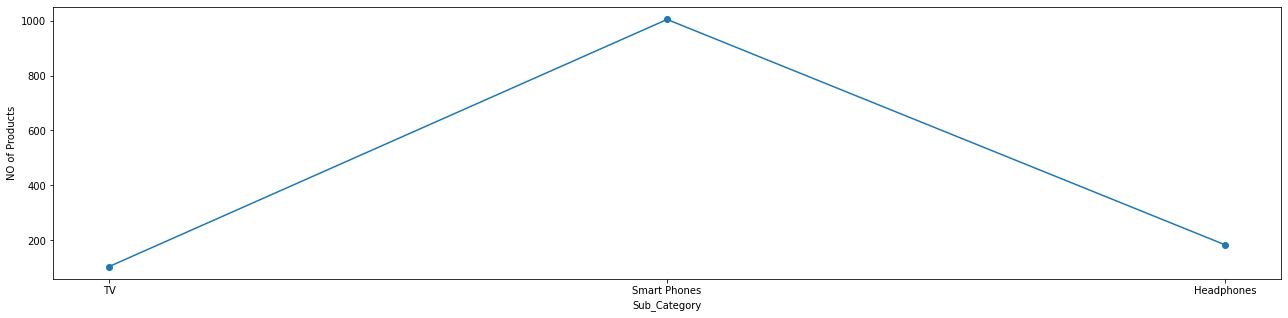

In [ ]:
plt.figure(figsize=(22,5))
plt.scatter(g2["x"], g2["y"])
plt.plot(g2["x"], g2["y"])
plt.xlabel("Sub_Category")
plt.ylabel("NO of Products")

In [27]:
%%bigquery --project $project_id g1
select Seller_Name as x,count(*) as y FROM `project1-310314.Project3.Products` p,`project1-310314.Project3.Sellers` s
where p.Seller_ID=s.Seller_ID group by Seller_Name
Limit 100

Text(0, 0.5, 'NO of Products')

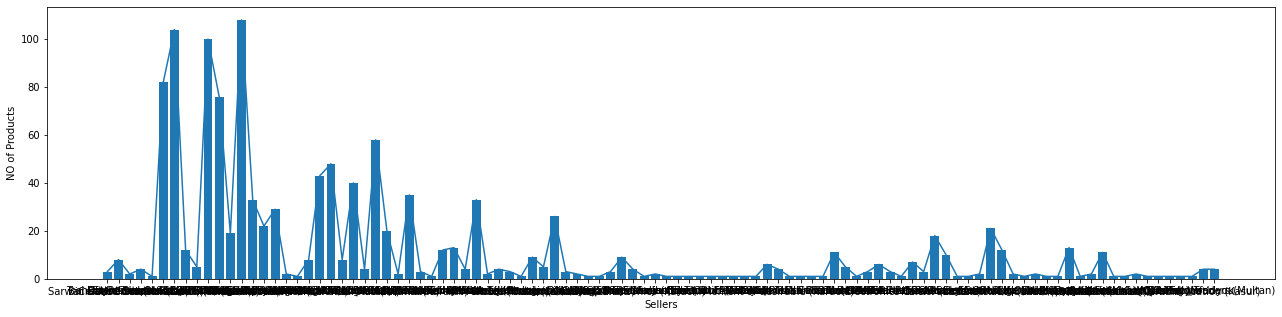

In [28]:
plt.figure(figsize=(22,5))
plt.bar(g1["x"], g1["y"])
plt.plot(g1["x"], g1["y"])
plt.xlabel("Sellers")
plt.ylabel("NO of Products")

In [18]:
%%bigquery --project $project_id g3

select Brand_Name as x,count(*) as y FROM `project1-310314.Project3.Products` p,`project1-310314.Project3.Brands` b 
where p.Brand_ID=b.Brand_ID group by Brand_Name

Text(0, 0.5, 'NO of Products')

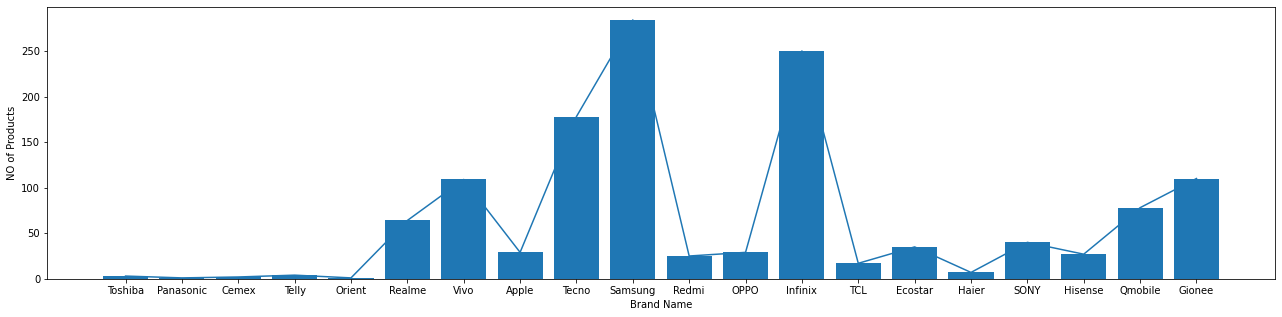

In [19]:
plt.figure(figsize=(22,5))
plt.bar(g3["x"], g3["y"])
plt.plot(g3["x"], g3["y"])
plt.xlabel("Brand Name")
plt.ylabel("NO of Products")

In [29]:
%%bigquery --project $project_id g4

select Rating_Score as x,count(*) as y FROM `project1-310314.Project3.Products` p
group by Rating_Score

Text(0, 0.5, 'NO of Products')

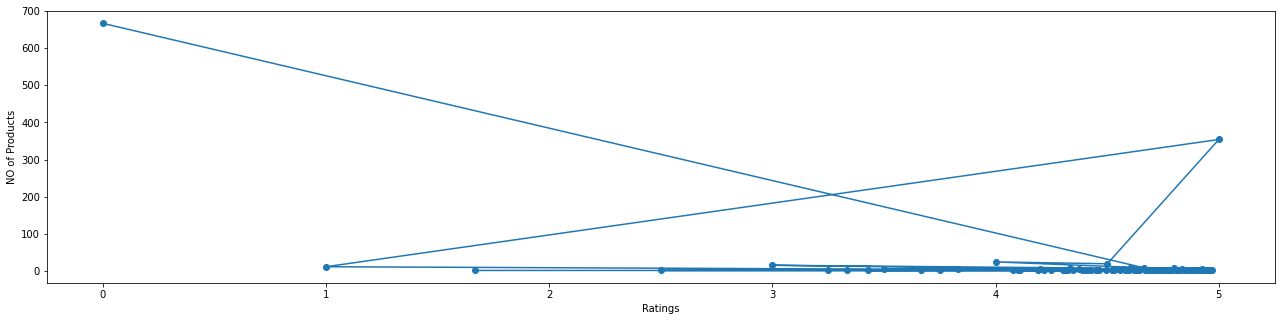

In [31]:
plt.figure(figsize=(22,5))
plt.scatter(g4["x"], g4["y"])
plt.plot(g4["x"], g4["y"])
plt.xlabel("Ratings")
plt.ylabel("NO of Products")

In [32]:
%%bigquery --project $project_id g4

select Review as x,count(*) as y FROM `project1-310314.Project3.Products` p
group by Review

Text(0, 0.5, 'NO of Products')

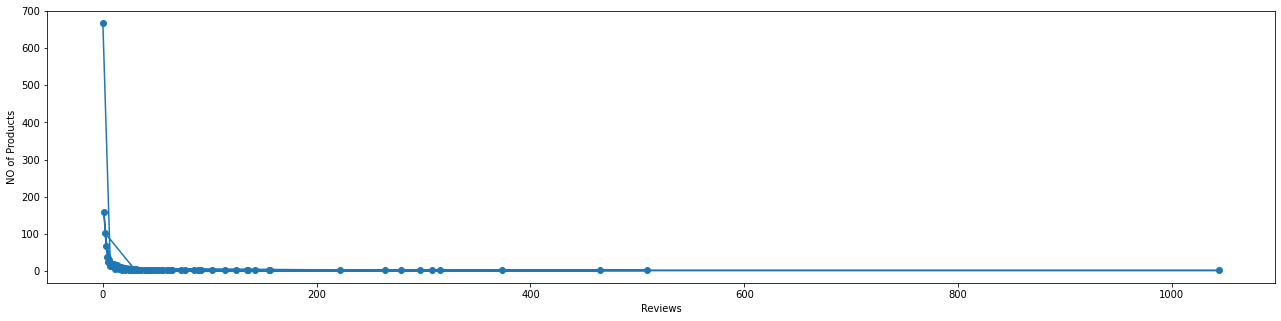

In [35]:
plt.figure(figsize=(22,5))
plt.scatter(g4["x"], g4["y"])
plt.plot(g4["x"], g4["y"])
plt.xlabel("Reviews")
plt.ylabel("NO of Products")

In [ ]:
# Run this cell to create a dataset to store your model, or create in the UI

model_dataset_name = 'Model'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('project1-310314', 'Model'))

In [99]:
%%bigquery --project $project_id

# YOUR QUERY HERE
SELECT IF(Top_Reviewed=1, 1, 0) AS label,
  Rating_Score AS Rating,
  Review as Review,
  Prize as Price,
  In_Stock as Availability
FROM `project1-310314.Project3.Products`
where Year = 2020
limit 10

,label,Rating,Review,Price,Availability
0,0,0.00000,0,Rs. 150000,True
1,0,4.71429,7,Rs. 15499,True
2,0,4.42857,7,Rs. 399,True
3,0,0.00000,0,Rs. 26999,True
4,0,0.00000,0,Rs. 19770,True
5,0,0.00000,0,Rs. 14990,True
6,0,0.00000,0,Rs. 4099,True
7,0,4.00000,2,Rs. 51000,True
8,0,4.50000,6,Rs. 39399,True
9,0,5.00000,8,Rs. 33499,True


In [100]:
%%bigquery --project $project_id

# YOUR QUERY HERE
CREATE OR REPLACE MODEL `Model.train` -- we'll call our model 'train'
OPTIONS 
(model_type='logistic_reg') AS
SELECT IF(Top_Reviewed=1, 1, 0) AS label,
  Rating_Score AS Rating,
  Review as Review,
  Prize as Price,
  In_Stock as Availability
FROM `project1-310314.Project3.Products`
where Year = 2020

""


In [101]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `Model.train`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,7,0.016809,0.085985,25.6,4046
1,0,6,0.023844,0.086679,12.8,5167
2,0,5,0.037299,0.096686,6.4,3695
3,0,4,0.061790,0.120850,3.2,4315
4,0,3,0.111049,0.169891,1.6,3804
5,0,2,0.214117,0.269952,0.8,3504
6,0,1,0.383013,0.424395,0.4,5039
7,0,0,0.561200,0.580267,0.2,3408


---

##Evaluate your model on unseen evaluation data.
##Now we will evaluate on products launched in 2021

---

In [102]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `Model.train`, 
            (SELECT IF(Top_Reviewed=1, 1, 0) AS label,
    Rating_Score AS Rating,
  Review as Review,
  Prize as Price,
  In_Stock as Availability
FROM `project1-310314.Project3.Products`
where Year = 2020))

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.769231,0.666667,0.989362,0.714286,0.030515,0.993513


In [103]:
%%bigquery --project $project_id 
#displays confusion matrix for the predicted results

SELECT
  *
FROM
  ML.CONFUSION_MATRIX(MODEL `Model.train`,
           (SELECT IF(Top_Reviewed=1, 1, 0) AS label,
   Rating_Score AS Rating,
  Review as Review,
  Prize as Price,
  In_Stock as Availability
FROM `project1-310314.Project3.Products`
where Year = 2020))

,expected_label,_0,_1
0,0,734,3
1,1,5,10


In [104]:
%%bigquery --project $project_id 
#table to display the the threshold and recall for all true and false postives and negatives.

SELECT
  *
FROM
  ML.ROC_CURVE(MODEL `Model.train`,
            (SELECT IF(Top_Reviewed=1, 1, 0) AS label,
   Rating_Score AS Rating,
  Review as Review,
  Prize as Price,
  In_Stock as Availability
FROM `project1-310314.Project3.Products`
where Year = 2020))

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,1.000000,0.066667,0.000000,1,0,737,14
1,0.878701,0.466667,0.001357,7,1,736,8
2,0.295090,0.866667,0.004071,13,3,734,2
3,0.116644,0.866667,0.013569,13,10,727,2
4,0.076071,0.933333,0.025780,14,19,718,1
...,...,...,...,...,...,...,...
63,0.003507,1.000000,0.959294,15,707,30,0
64,0.003444,1.000000,0.970149,15,715,22,0
65,0.003357,1.000000,0.979647,15,722,15,0
66,0.003275,1.000000,0.990502,15,730,7,0


## Data Prediction

##Predict your model on unseen evaluation data.
##Now we will predict on products launched in 2019

In [109]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.PREDICT(MODEL `Model.train`, (
  (SELECT IF(Top_Reviewed=1, 1, 0) AS label,
    Rating_Score AS Rating,
  Review as Review,
  Prize as Price,
  In_Stock as Availability
FROM `project1-310314.Project3.Products`
where Year = 2019)))

,predicted_label,predicted_label_probs,label,Rating,Review,Price,Availability
0,0,"[{'label': 1, 'prob': 0.02276131892436393}, {'...",0,0.0,0,Rs. 13940,True
1,0,"[{'label': 1, 'prob': 0.02276131892436393}, {'...",0,0.0,0,Rs. 44599,True
2,0,"[{'label': 1, 'prob': 0.02276131892436393}, {'...",0,0.0,0,Rs. 65599,True
3,0,"[{'label': 1, 'prob': 0.02276131892436393}, {'...",0,0.0,0,Rs. 55000,True
4,0,"[{'label': 1, 'prob': 0.0035065145575314902}, ...",0,0.0,0,Rs. 21999,True
...,...,...,...,...,...,...,...
227,0,"[{'label': 1, 'prob': 0.006193527724945158}, {...",0,5.0,3,Rs. 940,True
228,0,"[{'label': 1, 'prob': 0.03332974548261618}, {'...",0,5.0,1,Rs. 480,True
229,0,"[{'label': 1, 'prob': 0.03332974548261618}, {'...",0,5.0,1,Rs. 390,True
230,0,"[{'label': 1, 'prob': 0.03332974548261618}, {'...",0,5.0,1,Rs. 659,True


In [105]:
%%bigquery --project $project_id 
# function to display the precision and recall values

SELECT
  recall,
  true_positives / (true_positives + false_positives) AS precision
FROM
  ML.ROC_CURVE(MODEL `Model.train`,
            (SELECT IF(Top_Reviewed=1, 1, 0) AS label,
  Rating_Score AS Rating,
  Review as Review,
  Prize as Price,
  In_Stock as Availability
FROM `project1-310314.Project3.Products`
where Year = 2020))

,recall,precision
0,0.066667,1.000000
1,0.466667,0.875000
2,0.866667,0.812500
3,0.866667,0.565217
4,0.933333,0.424242
...,...,...
63,1.000000,0.020776
64,1.000000,0.020548
65,1.000000,0.020353
66,1.000000,0.020134


In [106]:
%%bigquery --project $project_id 
#shows the weight given to each feature while training the model
SELECT
  *
FROM
  ML.WEIGHTS(MODEL `Model.train`,
    STRUCT(true AS standardize))

,processed_input,weight,category_weights
0,Rating,0.174675,[]
1,Review,0.869834,[]
2,Price,NaN,"[{'category': 'Rs. 21990', 'weight': -2.029882..."
3,Availability,NaN,"[{'category': 'false', 'weight': -1.6173147770..."
4,__INTERCEPT__,-1.694252,[]


In [107]:
%%bigquery --project $project_id 
#displays the learning rate , duration and loss during each  iteration

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `Model.train`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,7,0.016809,0.085985,25.6,4046
1,0,6,0.023844,0.086679,12.8,5167
2,0,5,0.037299,0.096686,6.4,3695
3,0,4,0.061790,0.120850,3.2,4315
4,0,3,0.111049,0.169891,1.6,3804
5,0,2,0.214117,0.269952,0.8,3504
6,0,1,0.383013,0.424395,0.4,5039
7,0,0,0.561200,0.580267,0.2,3408


In [108]:
%%bigquery --project $project_id 
#although used mostly for linear regression, i used to determine via mean value which feature have overall mean value closer to 1
SELECT
  *
FROM
  ML.FEATURE_INFO(MODEL `Model.train`)

,input,min,max,mean,median,stddev,category_count,null_count
0,Rating,0.0,5.0,2.167458,0.0,2.362507,NaN,0.0
1,Review,0.0,509.0,8.358209,0.0,38.524502,NaN,0.0
2,Price,NaN,NaN,NaN,NaN,NaN,377.0,NaN
3,Availability,NaN,NaN,NaN,NaN,NaN,2.0,NaN


## Data Exploration

##Checking correlation of Rating with Top Reviewed Products

In [85]:
#identifying what number of products having ratings 3 and above are top reviewed
%%bigquery --project $project_id 

(SELECT Rating_Score AS Rating, count(Top_Reviewed) as Top_Reviewed_Count
FROM `project1-310314.Project3.Products`
where Rating_Score>=3
group by Rating_Score)

,Rating,Top_Reviewed_Count
0,4.71429,1
1,3.50000,4
2,4.42857,3
3,4.96667,1
4,4.00000,24
...,...,...
114,4.31034,1
115,4.18750,1
116,3.25000,1
117,4.21429,1


Text(0, 0.5, 'NO of Products')

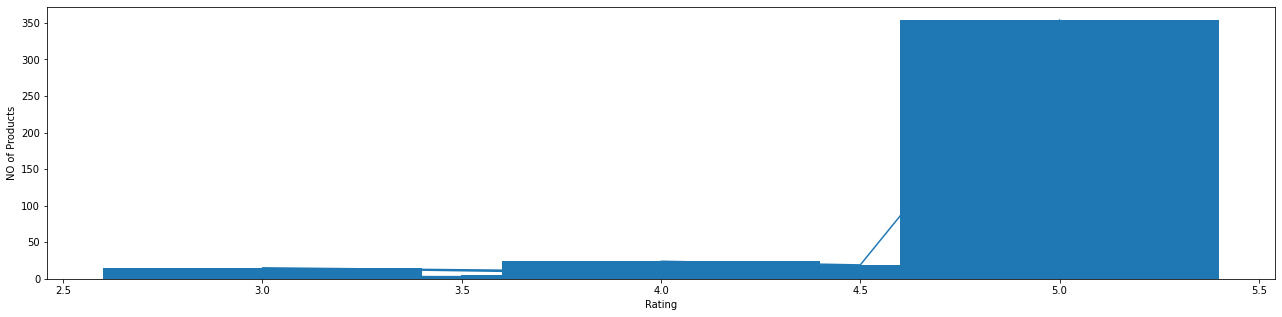

In [58]:
plt.figure(figsize=(22,5))
plt.bar(c1["Rating"], c1["Top_Reviewed_Count"])
plt.plot(c1["Rating"], c1["Top_Reviewed_Count"])
plt.xlabel("Rating")
plt.ylabel("NO of Products")

##Percentage of Top Reviewed Products that have Rating greater than and equal to 3

In [70]:
%%bigquery --project $project_id 

# YOUR QUERY HERE
SELECT ROUND(COUNTIF(Top_Reviewed=1 and Rating_Score>=3)/
                  (SELECT COUNT (Top_Reviewed=1) FROM `project1-310314.Project3.Products`)*1000,2)AS Top_Reviewed  
FROM `project1-310314.Project3.Products`

,Top_Reviewed
0,16.24


##Checking correlation of Reviews with Top Reviewed Products

In [84]:
#identifying what number of products having Reviews 100 and above are top reviewed
%%bigquery --project $project_id 

(SELECT Review AS Reviews, count(Top_Reviewed) as Top_Reviewed_Count
FROM `project1-310314.Project3.Products`
where Review>=100
group by Review)

,Reviews,Top_Reviewed_Count
0,279,1
1,315,1
2,1044,1
3,125,1
4,509,1
5,222,1
6,297,1
7,264,1
8,465,1
9,373,1


Text(0, 0.5, 'NO of Products')

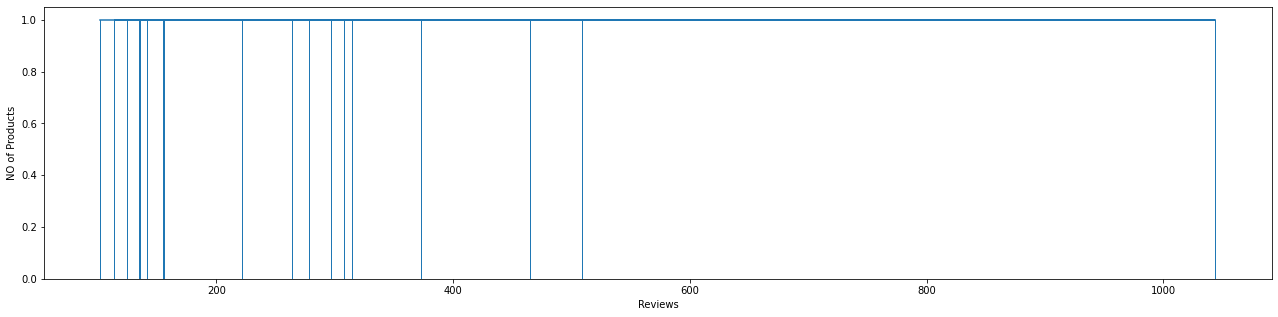

In [65]:
plt.figure(figsize=(22,5))
plt.bar(c2["Reviews"], c2["Top_Reviewed_Count"])
plt.plot(c2["Reviews"], c2["Top_Reviewed_Count"])
plt.xlabel("Reviews")
plt.ylabel("NO of Products")

##Percentage of Top Reviewed Products that have Reviews greater than and equal to 100

In [68]:
%%bigquery --project $project_id 

# YOUR QUERY HERE
SELECT ROUND(COUNTIF(Top_Reviewed=1 and Review>=100)/
                  (SELECT COUNT (Top_Reviewed=1) FROM `project1-310314.Project3.Products`)*10000,2)AS Top_Reviewed  
FROM `project1-310314.Project3.Products`

,Top_Reviewed
0,85.07


##Checking correlation of Availability with Top Reviewed Products



In [83]:
%%bigquery --project $project_id 

(SELECT In_Stock AS Availability, count(Top_Reviewed) as Top_Reviewed_Count
FROM `project1-310314.Project3.Products`
group by In_Stock) 


,Availability,Top_Reviewed_Count
0,True,1054
1,False,239


Text(0, 0.5, 'NO of Products')

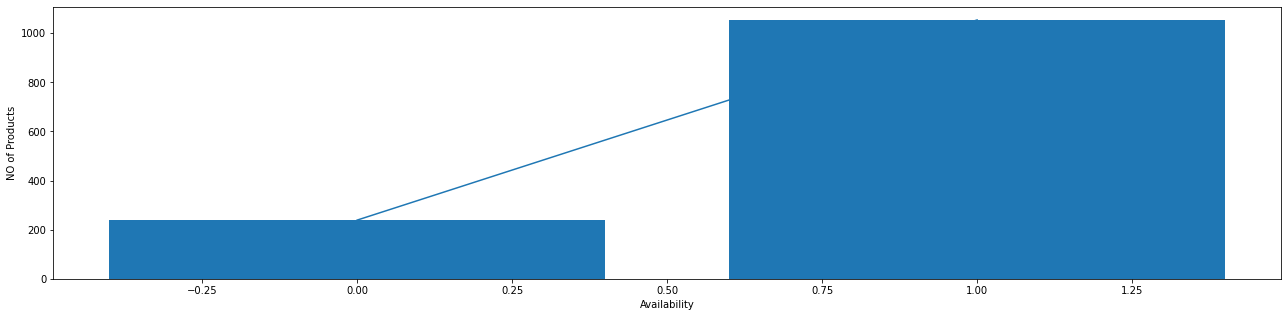

In [82]:
plt.figure(figsize=(22,5))
plt.bar(c4["Availability"], c4["Top_Reviewed_Count"])
plt.plot(c4["Availability"], c4["Top_Reviewed_Count"])
plt.xlabel("Availability")
plt.ylabel("NO of Products")

##Percentage of Top Reviewed Products that are Currently Available

In [87]:
%%bigquery --project $project_id 

# YOUR QUERY HERE
SELECT ROUND(COUNTIF(Top_Reviewed=1 and In_Stock=True)/
                  (SELECT COUNT (Top_Reviewed=1) FROM `project1-310314.Project3.Products`)*1000,2)AS Top_Reviewed  
FROM `project1-310314.Project3.Products`

,Top_Reviewed
0,11.6


## Conclusion

---

In order to make a prediction model for my dataset, it was essential to study it deeply. This is because there are a number of features that affect the Product to become Top Reviewed. But not all of them hold equal importance. Thus, in data analysis part, i studied the coorelation between the attrributes and made graphs.

This way, i explored and made graphs for those attributes that had the highest percentage of relation between them. Logistic regression was used as the training model type.

---